In [97]:
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv("../experiments/output.csv")
df["datetime"] = pd.to_datetime(df["datetime"])
df["day"] = df["datetime"].dt.date

In [99]:
df.tail(50)

,datetime,product,display,num_slots,quantity_sold,price,revenue,day
1285,2021-05-30 20:00:00,coca_cola_20oz_bottle,dairy-cooler,4,3.0,1.99,5.97,2021-05-30
1286,2021-05-30 20:00:00,dr_pepper_20oz_bottle,dairy-cooler,2,1.0,0.99,0.99,2021-05-30
1287,2021-05-30 20:00:00,diet_coke_20oz_bottle,dairy-cooler,3,2.0,1.99,3.98,2021-05-30
1288,2021-05-30 20:00:00,sprite_20oz_bottle,dairy-cooler,2,2.0,1.99,3.98,2021-05-30
1289,2021-05-30 20:00:00,Monster_16oz_can,dairy-cooler,9,2.0,2.99,5.98,2021-05-30
1290,2021-05-31 00:00:00,coca_cola_20oz_bottle,entrance-cooler,4,1.0,1.99,1.99,2021-05-31
1291,2021-05-31 00:00:00,dr_pepper_20oz_bottle,entrance-cooler,2,0.0,0.99,0.00,2021-05-31
1292,2021-05-31 00:00:00,diet_coke_20oz_bottle,entrance-cooler,3,0.0,1.99,0.00,2021-05-31
1293,2021-05-31 00:00:00,sprite_20oz_bottle,entrance-cooler,2,0.0,1.99,0.00,2021-05-31
1294,2021-05-31 00:00:00,Monster_16oz_can,entrance-cooler,9,0.0,2.99,0.00,2021-05-31


In [100]:
# standardize
mu = df["revenue"].mean()
sig = df["revenue"].std()
df['revenue'] = (df['revenue'] - mu) / sig

# standardize
mu = df["quantity_sold"].mean()
sig = df["quantity_sold"].std()
df['quantity_sold'] = (df['quantity_sold'] - mu) / sig

In [101]:
df.head()

,datetime,product,display,num_slots,quantity_sold,price,revenue,day
0,2021-05-01 12:00:00,coca_cola_20oz_bottle,dairy-cooler,4,-0.074961,1.99,-0.089403,2021-05-01
1,2021-05-01 12:00:00,dr_pepper_20oz_bottle,dairy-cooler,4,-0.833094,0.99,-0.714963,2021-05-01
2,2021-05-01 12:00:00,diet_coke_20oz_bottle,dairy-cooler,4,-0.833094,1.99,-0.714963,2021-05-01
3,2021-05-01 12:00:00,sprite_20oz_bottle,dairy-cooler,4,-0.833094,1.99,-0.714963,2021-05-01
4,2021-05-01 12:00:00,Monster_16oz_can,dairy-cooler,4,-0.833094,2.99,-0.714963,2021-05-01


In [108]:
groups = df[['display','product','num_slots','quantity_sold', 'revenue']].groupby(["display","product"]).mean()

In [109]:
groups.reset_index(inplace=True)

In [110]:
groups

,display,product,num_slots,quantity_sold,revenue
0,dairy-cooler,Monster_16oz_can,8.882979,0.562193,1.014875
1,dairy-cooler,coca_cola_20oz_bottle,4.650000,0.319268,0.235888
2,dairy-cooler,diet_coke_20oz_bottle,2.888889,-0.274067,-0.253692
3,dairy-cooler,dr_pepper_20oz_bottle,2.160000,0.167641,-0.304168
4,dairy-cooler,sprite_20oz_bottle,2.062500,-0.185522,-0.180631
5,deli-cooler,Monster_16oz_can,8.929577,0.159953,0.516189
6,deli-cooler,coca_cola_20oz_bottle,4.461538,-0.133279,-0.137523
7,deli-cooler,diet_coke_20oz_bottle,2.986842,-0.404151,-0.361028
8,deli-cooler,dr_pepper_20oz_bottle,2.243590,-0.211037,-0.459613
9,deli-cooler,sprite_20oz_bottle,2.346667,-0.560166,-0.489762


In [111]:
colors = {
    'Monster_16oz_can':'green', 
    'coca_cola_20oz_bottle':'red', 
    'diet_coke_20oz_bottle':'gray', 
    'dr_pepper_20oz_bottle':'orange',
    'sprite_20oz_bottle': 'blue'
}

Text(0, 0.5, 'quantity sold')

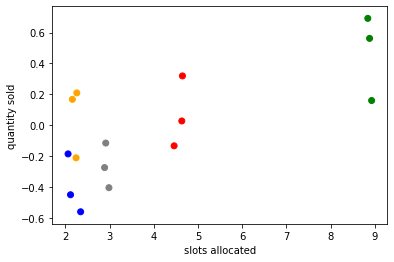

In [112]:
plt.scatter(groups["num_slots"], groups["quantity_sold"], c=groups['product'].map(colors))
plt.xlabel("slots allocated")
plt.ylabel("quantity sold")

Text(0, 0.5, 'total revenue')

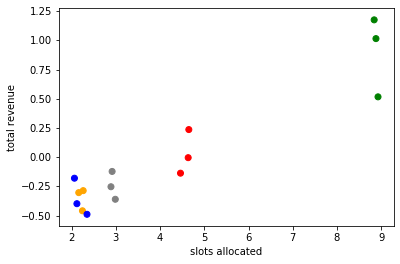

In [113]:
plt.scatter(groups["num_slots"], groups["revenue"],  c=groups['product'].map(colors))
plt.xlabel("slots allocated")
plt.ylabel("total revenue")

In [114]:
groups["q_sold_slope"] = groups['quantity_sold'] / groups['num_slots']
groups["revenue_slope"] = groups['revenue'] / groups['num_slots']

In [115]:
groups

,display,product,num_slots,quantity_sold,revenue,q_sold_slope,revenue_slope
0,dairy-cooler,Monster_16oz_can,8.882979,0.562193,1.014875,0.063289,0.114249
1,dairy-cooler,coca_cola_20oz_bottle,4.650000,0.319268,0.235888,0.068660,0.050729
2,dairy-cooler,diet_coke_20oz_bottle,2.888889,-0.274067,-0.253692,-0.094869,-0.087816
3,dairy-cooler,dr_pepper_20oz_bottle,2.160000,0.167641,-0.304168,0.077612,-0.140819
4,dairy-cooler,sprite_20oz_bottle,2.062500,-0.185522,-0.180631,-0.089950,-0.087578
5,deli-cooler,Monster_16oz_can,8.929577,0.159953,0.516189,0.017913,0.057807
6,deli-cooler,coca_cola_20oz_bottle,4.461538,-0.133279,-0.137523,-0.029873,-0.030824
7,deli-cooler,diet_coke_20oz_bottle,2.986842,-0.404151,-0.361028,-0.135310,-0.120873
8,deli-cooler,dr_pepper_20oz_bottle,2.243590,-0.211037,-0.459613,-0.094062,-0.204856
9,deli-cooler,sprite_20oz_bottle,2.346667,-0.560166,-0.489762,-0.238707,-0.208705


In [116]:
groups[['product', 'q_sold_slope', 'revenue_slope']].groupby("product").mean()

,q_sold_slope,revenue_slope
product,,
Monster_16oz_can,0.053141,0.101661
coca_cola_20oz_bottle,0.014921,0.006297
diet_coke_20oz_bottle,-0.089910,-0.083592
dr_pepper_20oz_bottle,0.025387,-0.157555
sprite_20oz_bottle,-0.180357,-0.161520


## Slots over time

In [117]:
groups_time = df[['display','product','num_slots','datetime', 'day']].groupby(["day","product"]).mean()

In [118]:
groups_time.head()

num_slots
day        product                         
2021-05-01 Monster_16oz_can           4.000
           coca_cola_20oz_bottle     10.625
           diet_coke_20oz_bottle      4.000
           dr_pepper_20oz_bottle      3.625
           sprite_20oz_bottle         5.500

In [119]:
groups_time.reset_index(inplace=True)

In [120]:
groups_time

,day,product,num_slots
0,2021-05-01,Monster_16oz_can,4.000
1,2021-05-01,coca_cola_20oz_bottle,10.625
2,2021-05-01,diet_coke_20oz_bottle,4.000
3,2021-05-01,dr_pepper_20oz_bottle,3.625
4,2021-05-01,sprite_20oz_bottle,5.500
...,...,...,...
150,2021-05-31,Monster_16oz_can,9.000
151,2021-05-31,coca_cola_20oz_bottle,4.000
152,2021-05-31,diet_coke_20oz_bottle,3.000
153,2021-05-31,dr_pepper_20oz_bottle,2.000


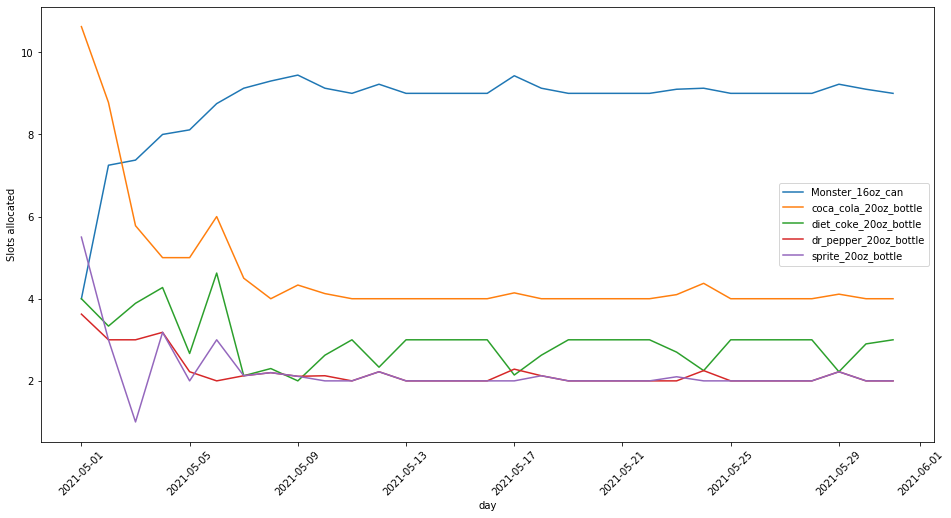

In [123]:
fig = plt.figure(figsize=(16,8))
for g, dta in groups_time.groupby("product"):
    plt.plot(dta['day'], dta["num_slots"], label=g)
plt.xticks(rotation=45)
plt.xlabel("day")
plt.ylabel("Slots allocated")
plt.legend(loc='best')